# 🛌 Sleep Disorder Prediction using Machine Learning

## 🧠 Project Overview

This project aims to assist a healthcare provider specializing in Polysomnography by leveraging machine learning to predict sleep disorders such as:

None

Insomnia

Sleep Apnea

## 🎯 Objectives:

Enable early detection of sleep disorders.

Provide personalized care through tailored interventions.

Understand how lifestyle and health factors influence sleep disorders.

## 📥Import Libraries

In [161]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from itertools import cycle

# Warnings
import warnings
warnings.filterwarnings("ignore")

## 📥 Data Loading & Initial Inspection
### 🔍 Objective:
To load the dataset and perform an initial inspection to understand its structure, data types, and get a sense of the features available for analysis and modeling.

In [164]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Project 1\Sleep_health_and_lifestyle_dataset.csv")  

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Show the first few rows of the dataset
df.head()


Dataset shape: (374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [166]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


🔸Shape: The dataset contains 374 rows and 13 columns.

🔸Features include:

🔸Demographics: Person ID, Gender, Age, Occupation

🔸Sleep & lifestyle: Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Daily Steps

🔸Health indicators: BMI Category, Blood Pressure, Heart Rate

🔸Target: Sleep Disorder

🔸Target column (Sleep Disorder) includes categories like:

🔸None (missing or NaN currently)

🔸Sleep Apnea

🔸Possibly Insomnia (we'll confirm during EDA)

🔸Issue Noted: The Sleep Disorder column has some missing values (NaN). We'll address this during preprocessing.

🔸Special Handling Needed:

🔸Blood Pressure is a composite feature (e.g., 126/83) and should be split into Systolic and Diastolic values.

🔸Person ID is likely a unique identifier and not useful for modeling.

## 📊 Data Overview & Summary Statistics
We'll now inspect the structure, types, missing values, and descriptive statistics of the dataset to understand its quality and composition.

In [170]:
# Display data types and non-null counts
print("🔍 Dataset Info:\n")
df.info()


🔍 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [172]:
# Check for missing values
print("\n🧼 Missing Values:\n")
print(df.isnull().sum())


🧼 Missing Values:

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


##### 🔸No truly missing values except for Sleep Disorder, but those are not actual missing values—they represent the "None" category.

In [175]:
# View summary statistics for numeric columns
print("\n📈 Summary Statistics:\n")
print(df.describe())


📈 Summary Statistics:

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%    

In [177]:
# View unique values in the target column
print("\n🎯 Target Distribution (Raw Values):\n")
print(df['Sleep Disorder'].value_counts(dropna=False))



🎯 Target Distribution (Raw Values):

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


## 🛠️ Fix Target Column

In [180]:
# Replace NaN in 'Sleep Disorder' with 'None' (i.e., no disorder)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Verify the change
print("✅ Updated Sleep Disorder Value Counts:\n")
print(df['Sleep Disorder'].value_counts())


✅ Updated Sleep Disorder Value Counts:

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


#### ✅ Final Summary: Data Cleaning and Target Fixing
Category	Count	Percentage
None	219	58.6%
Sleep Apnea	78	20.9%
Insomnia	77	20.6%

🧩 Interpretation: Most individuals in the dataset do not have a diagnosed sleep disorder, but we have enough samples of Sleep Apnea and Insomnia to perform meaningful classification.



## 📊Exploratory Data Analysis (EDA)

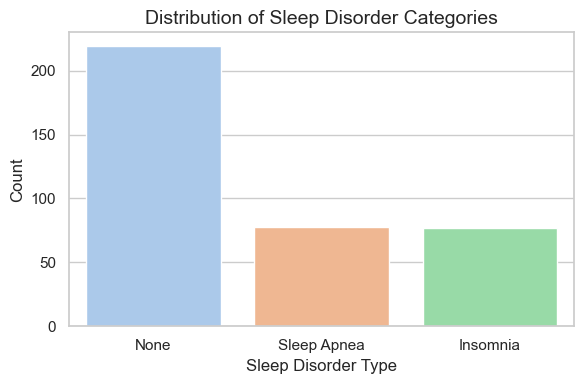

In [27]:
# Set theme
sns.set(style="whitegrid")

# Plot target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Sleep Disorder', data=df, palette='pastel')
plt.title("Distribution of Sleep Disorder Categories", fontsize=14)
plt.xlabel("Sleep Disorder Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


✅  The target distribution visualization confirms:

🔸Majority class: None (no sleep disorder)

🔸Minority classes: Sleep Apnea and Insomnia have nearly equal representation

📌 Observation:

🔸While the dataset is slightly imbalanced, the class sizes are still large enough to build a reliable classification model.

🔸We will address this imbalance later during model training (e.g., using class weights or resampling techniques if needed).

### 📊 Univariate Analysis of Numerical Features

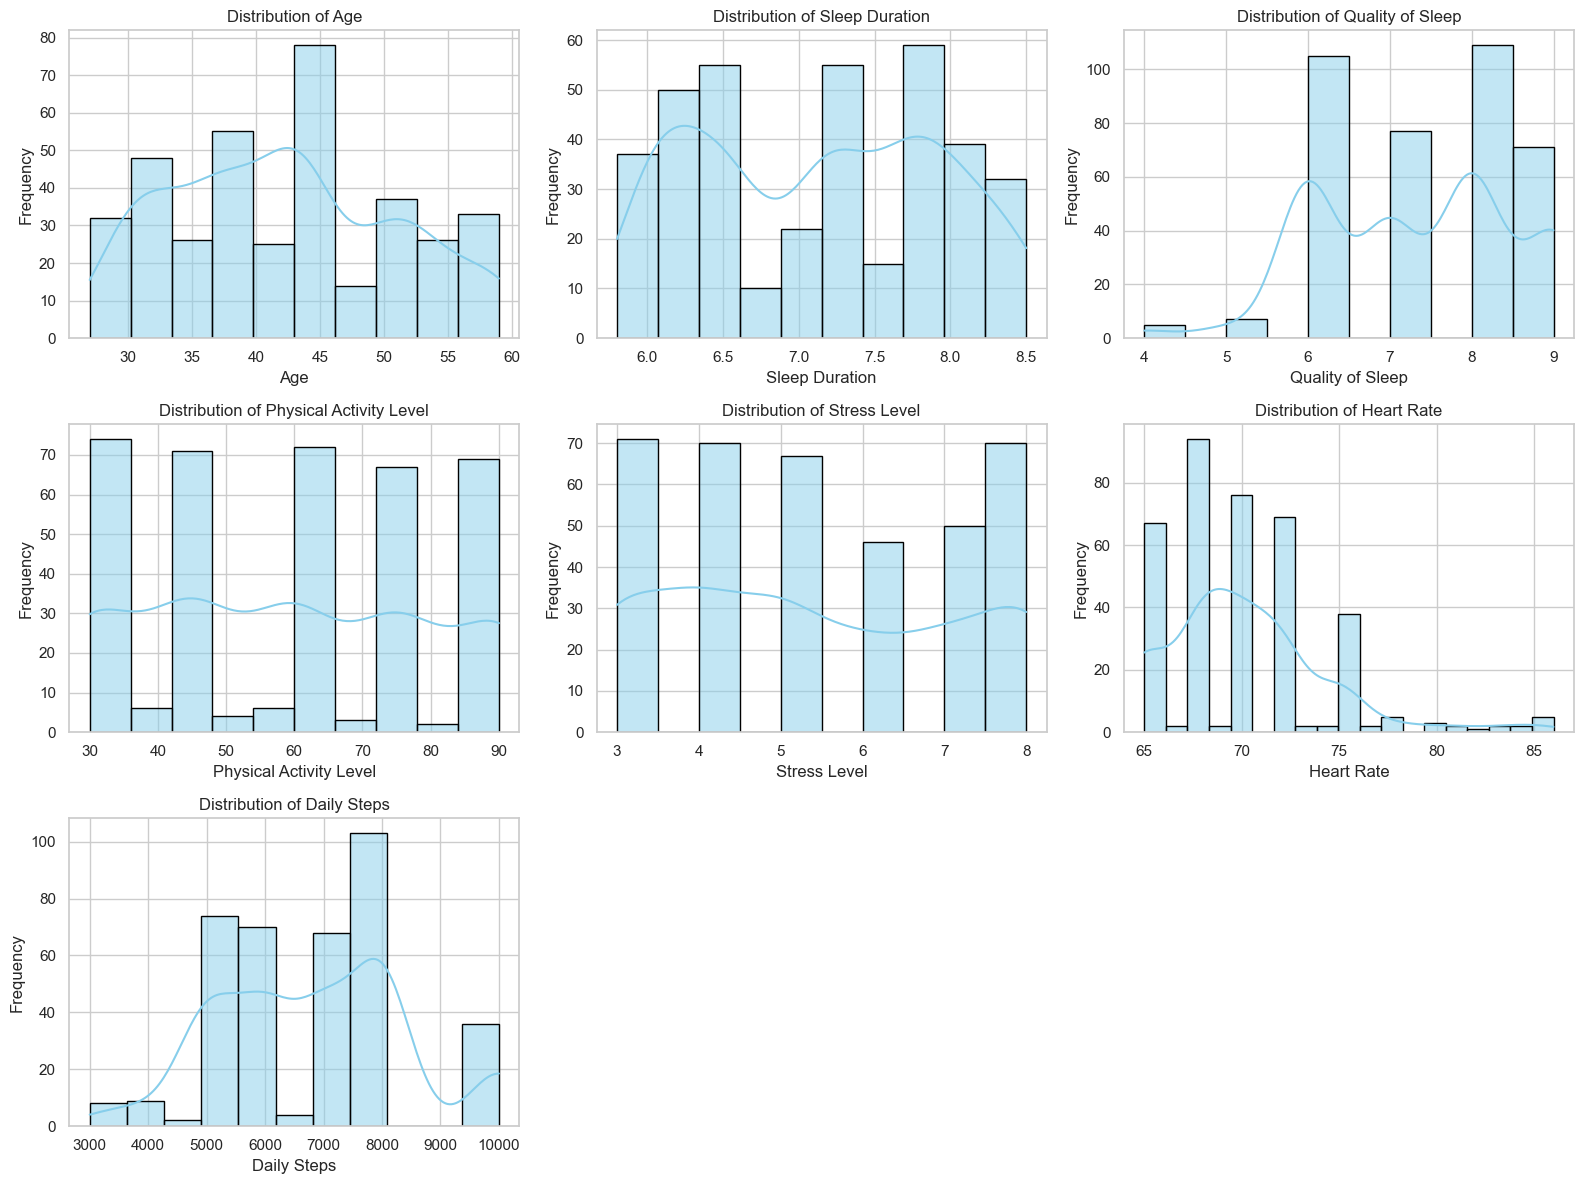

In [31]:
# List of numerical features
num_features = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Plot histograms with KDE
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Summary

🔢 Age

🔸 Range: 27–59, mostly centered around 35–50.

🔸 Fairly uniform spread; no strong skew.

🛌 Sleep Duration

🔸 Mostly between 6.0–8.5 hours.

🔸 Slight right skew, some may sleep longer than average.

🌙 Quality of Sleep

🔸 Range: 4–9 (on a 1–10 scale).

🔸 Most people rate their sleep between 6–8.

⚠️ Slight left skew — very low quality is rare.

🏃 Physical Activity Level

🔸 Range: 30–90.

🔸 Noticeable multimodal distribution — common activity levels around 30, 45, 60, and 75.

📌 Might represent defined activity brackets.

😫 Stress Level

🔸 Range: 3–8.

🔸 Clustered around 4–5 with fewer low/high stress reports.

📌 Fairly symmetric.

❤️ Heart Rate

🔸 Range: ~65–85 bpm.

🔸 Right-skewed — most fall between 65–72 bpm.

⚠️ A few higher values may be worth checking for outliers.

👟 Daily Steps

🔸 Range: 3000–10000 steps.

🔸 Bimodal tendency — common around 6000–7000 and 8000+.

📌 Might indicate sedentary vs active groups.

### 📊 Univariate Analysis of Categorical Features

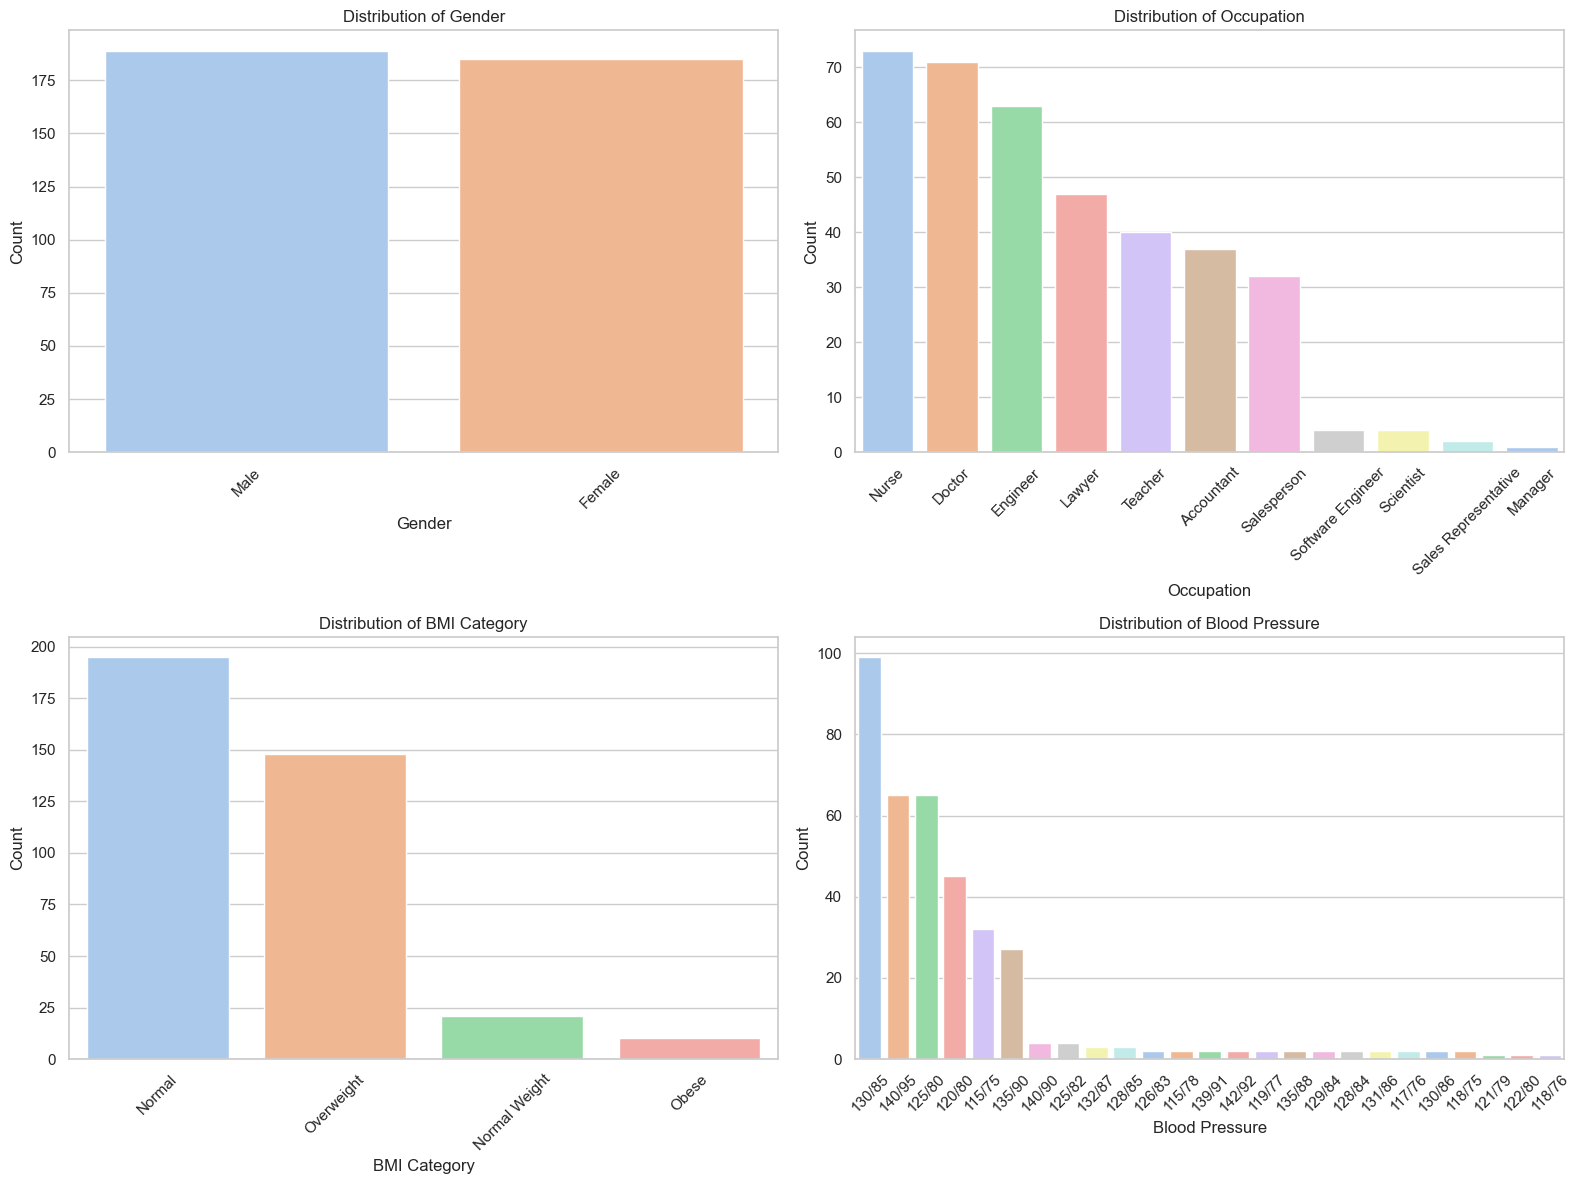

In [35]:
# Set style
sns.set(style="whitegrid")

# List of categorical features
cat_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

# Plot count plots for each
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### 📌Summary

👥 Gender:

🔸The dataset has an almost perfectly balanced gender distribution between Male and Female.

💼 Occupation:

🔸The most common professions are Nurse, Doctor, and Engineer.

🔸Roles like Manager, Sales Representative, and Scientist appear far less frequently.

⚖️ BMI Category:

🔸The majority fall under Normal and Overweight categories.

🔸Smaller proportions are labeled as Normal Weight and Obese.

🩸 Blood Pressure:

🔸Blood pressure readings like 130/85, 120/80, and 120/60 are most common.

🔸There is a long tail of less frequent and potentially irregular blood pressure readings, which may need grouping or binning later in preprocessing.

### 📊 Bivariate Analysis: Numerical Features vs. Sleep Disorder
We’ll begin by visualizing the distribution of numerical features grouped by the target variable Sleep Disorder.

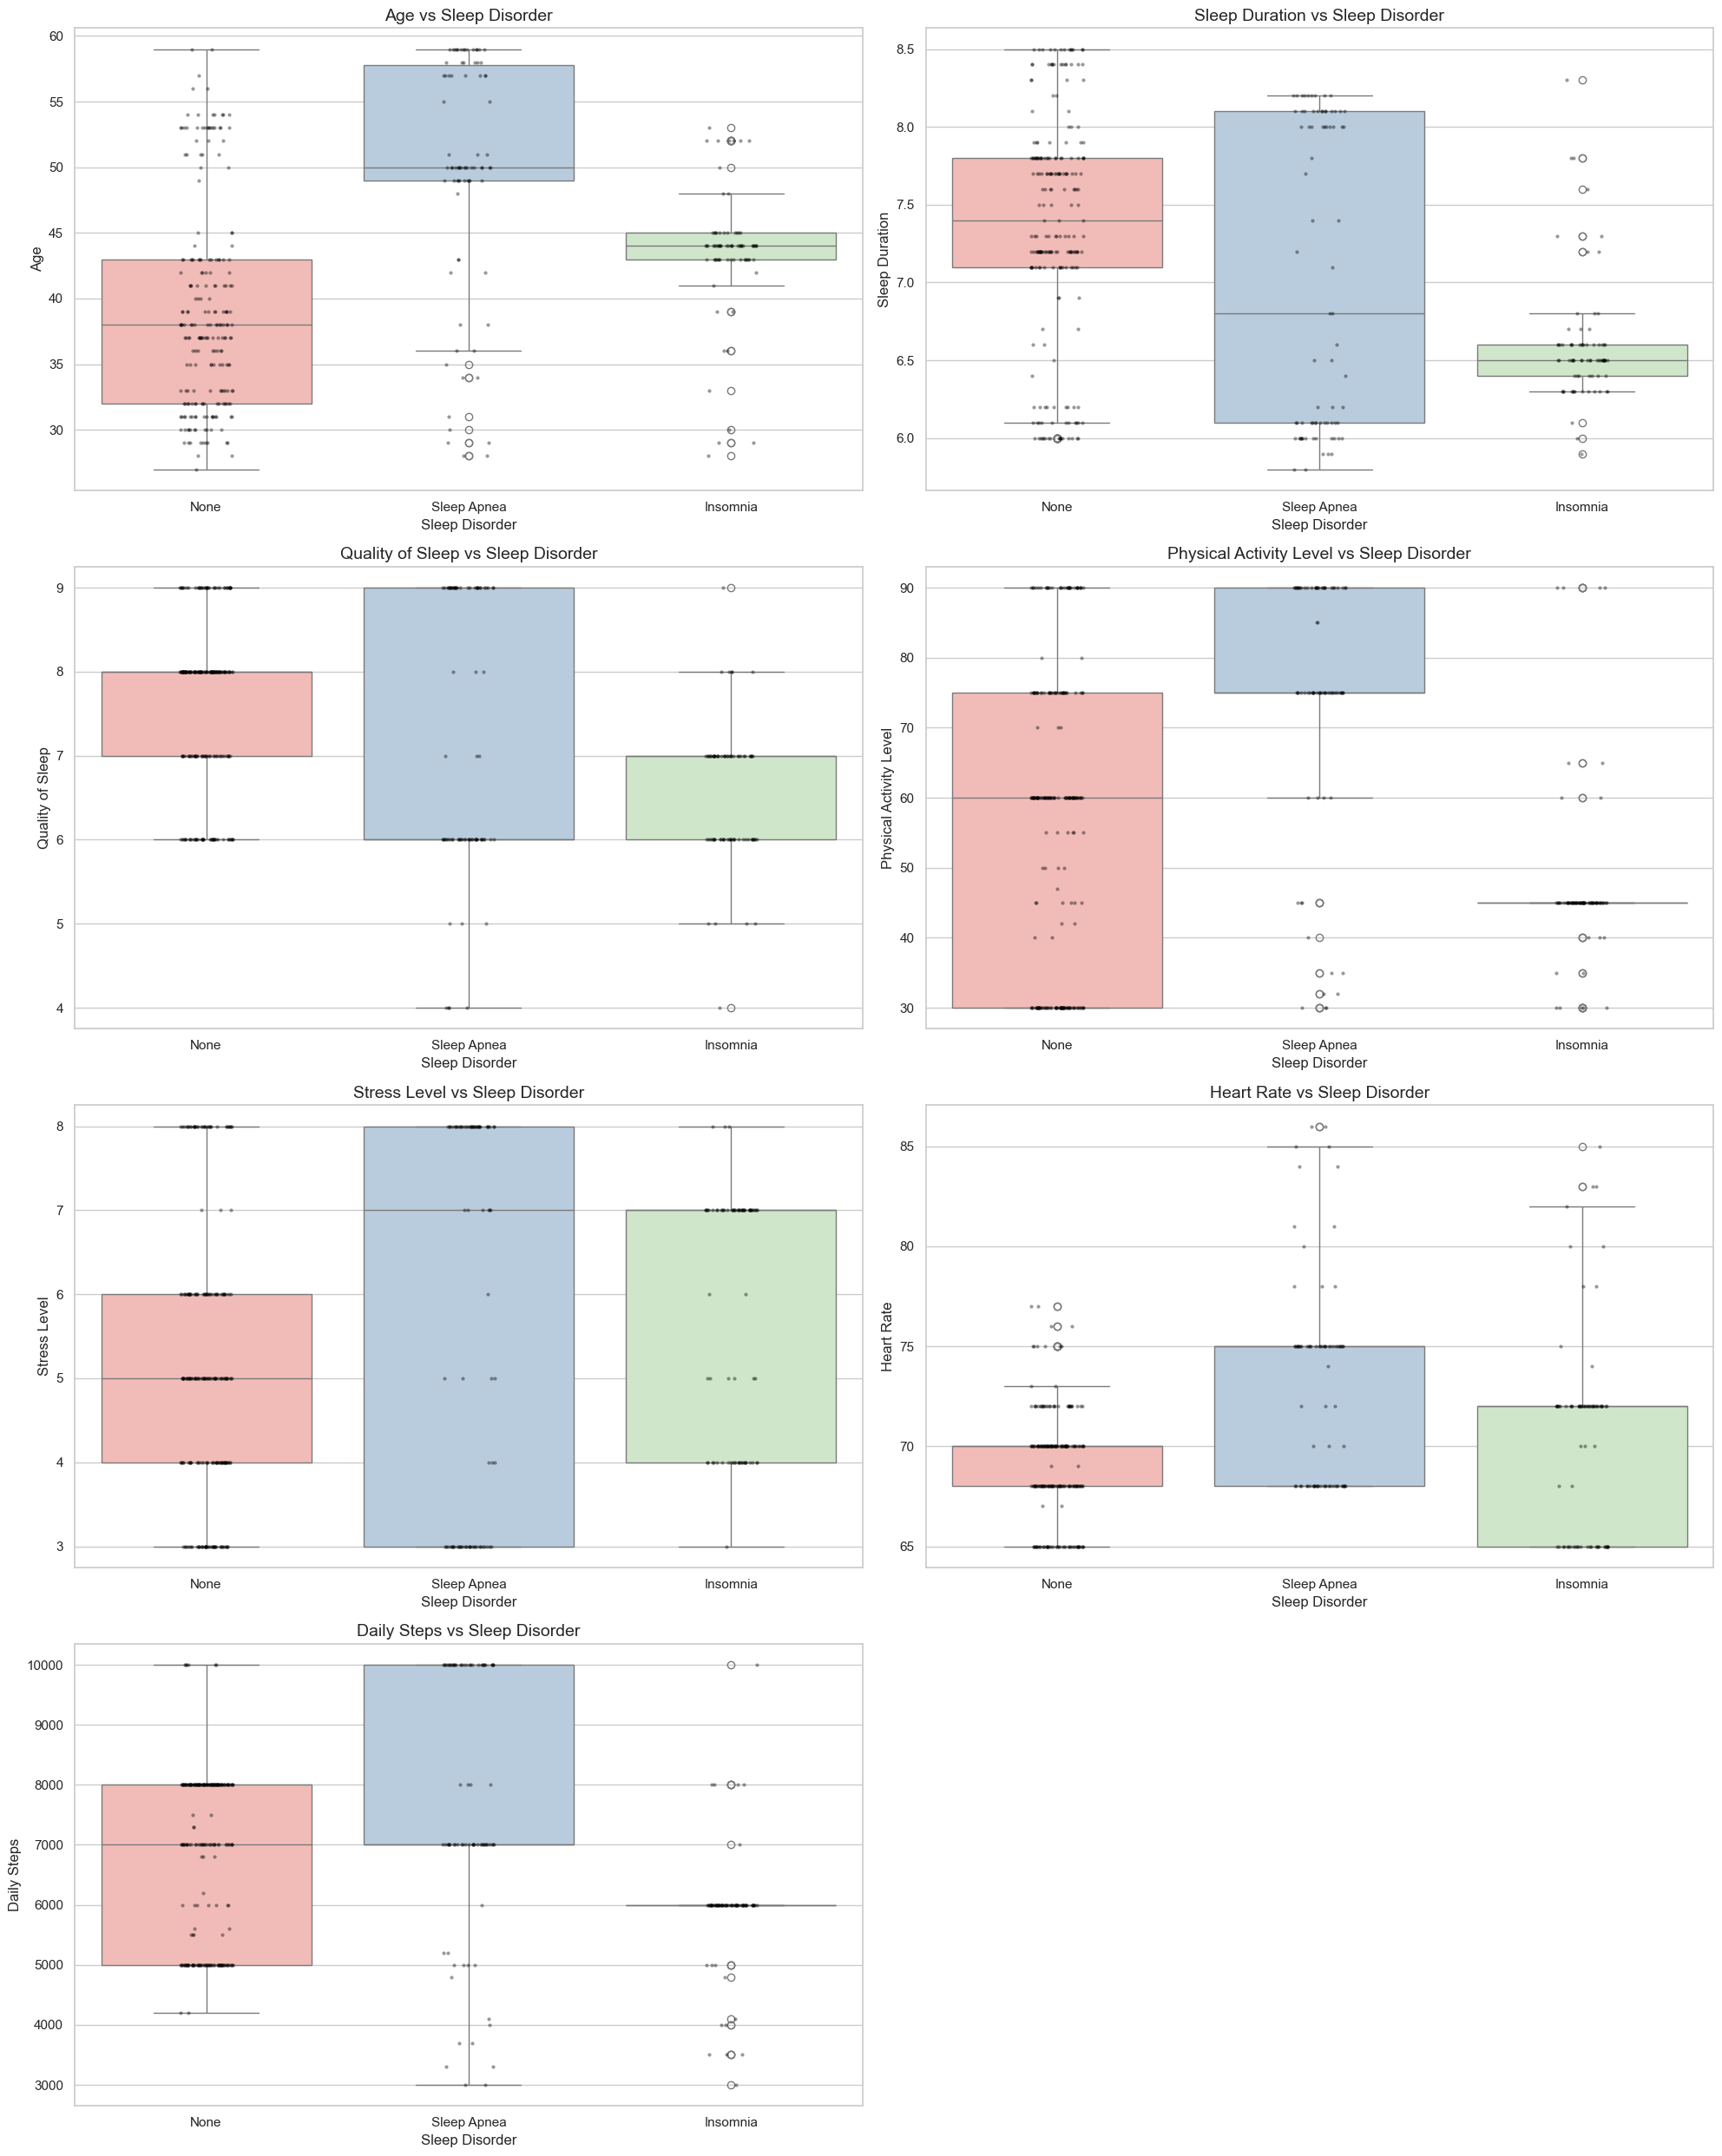

In [39]:
# List of numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                      'Stress Level', 'Heart Rate', 'Daily Steps']

# Set up plot style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(20, 25))

# Create boxplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Sleep Disorder', y=feature, data=df, palette='Pastel1')
    sns.stripplot(x='Sleep Disorder', y=feature, data=df, color='black', size=3, jitter=True, alpha=0.4)
    plt.title(f'{feature} vs Sleep Disorder', fontsize=14)
    plt.xlabel('Sleep Disorder')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

#### 📈 Summary: Numerical Features vs. Sleep Disorder 💤
📌 Key Observations from Boxplots

🔹 Age

🔸People with Sleep Apnea tend to be older than those with No Disorder or Insomnia.

🛏️ Sleep Duration

🔸Individuals with Insomnia have significantly lower sleep duration.

🔸No Disorder and Sleep Apnea groups show higher and more consistent sleep durations.

🌙 Quality of Sleep

Highest in the No Disorder group, lower in Insomnia, with Sleep Apnea showing wide variability.

🏃 Physical Activity Level

🔸No Disorder and Sleep Apnea individuals show higher activity than those with Insomnia.

🔸Insomnia group has the lowest and most consistent activity level.

😖 Stress Level

🔸Highest in Insomnia group, followed by Sleep Apnea. Lowest in No Disorder.

🔸Clear upward trend of stress from No Disorder → Sleep Apnea → Insomnia.

❤️ Heart Rate

🔸Slightly elevated for Sleep Apnea, but less distinction across groups compared to other features.

👣 Daily Steps

🔸Lower in Insomnia, moderate in No Disorder, and highest in Sleep Apnea.



#### 📊 Bivariate Analysis: Categorical Features vs. Sleep Disorder
We’ll begin by visualizing the distribution of categorical features grouped by the target variable Sleep Disorder.

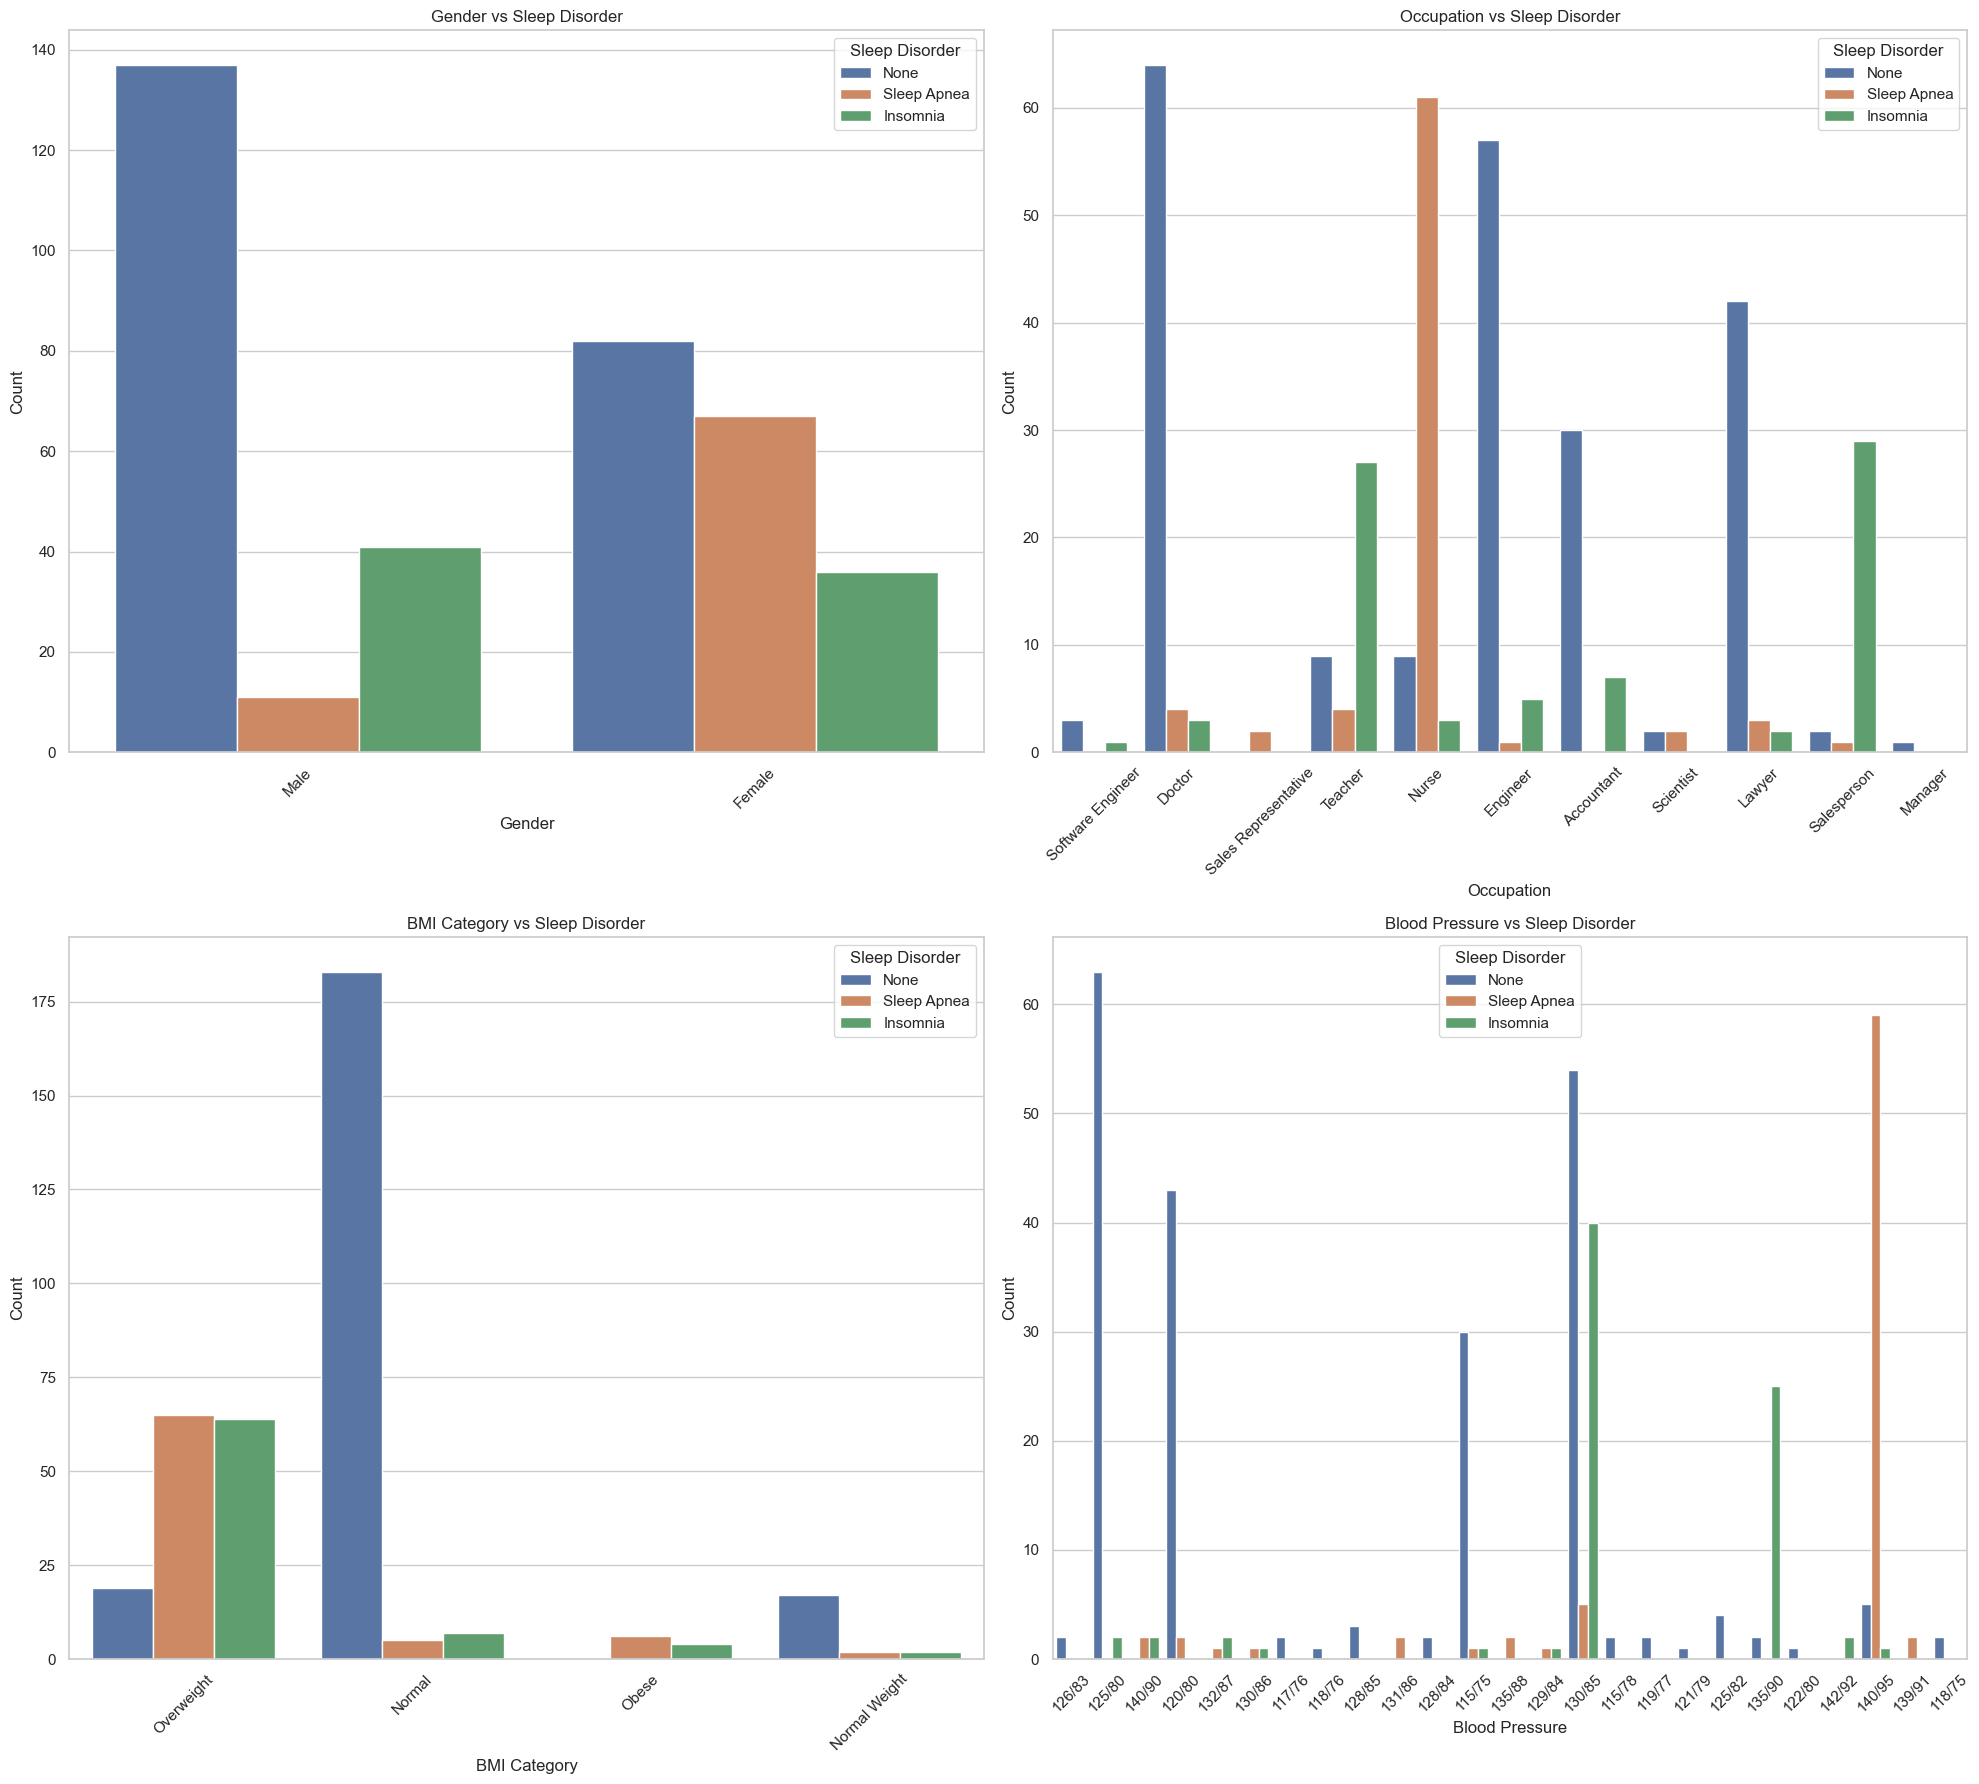

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
plt.figure(figsize=(20, 18))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, hue='Sleep Disorder')
    plt.title(f"{feature} vs Sleep Disorder")
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### 🧠 Insights from Categorical Features vs. Sleep Disorder

1. Gender
   
🔸Males show a higher proportion of no disorder, but also a relatively higher count of Sleep Apnea.

🔸Females have a greater number of Insomnia cases compared to males.

🔍 Insight: Gender seems to influence sleep disorder types — males lean toward Sleep Apnea, while females are more prone to Insomnia.

2. Occupation

🔸Nurses and Engineers appear prominently in Sleep Apnea cases.

🔸Teachers and Accountants show some Insomnia prevalence.

🔸Some professions (e.g., Software Engineer, Sales Rep, Manager) have small sample sizes but still reflect variation.

🔍 Insight: Certain occupations might have lifestyle or stress-related factors contributing to specific sleep disorders.

3. BMI Category
   
🔸Most individuals with normal BMI fall under the "None" category.

🔸Overweight and Obese individuals have noticeably higher Sleep Apnea incidence.

🔍 Insight: Higher BMI appears strongly linked to Sleep Apnea, consistent with clinical observations.

4. Blood Pressure

🔸Certain BP combinations like 130/85, 120/80, 125/80 show higher No Disorder counts.

🔸Sleep Apnea is visible in ranges like 140/90, 145/90, and 135/85.

🔸Insomnia appears across a broader range but not as tightly clustered as Sleep Apnea.

🔍 Insight: Elevated blood pressure correlates moderately with Sleep Apnea, while Insomnia appears less pressure-dependent.

### 🔥 Correlation Heatmap
A correlation heatmap helps visualize the strength of relationships between numerical variables. This can inform us about multicollinearity or potential predictive relationships.

Numeric Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


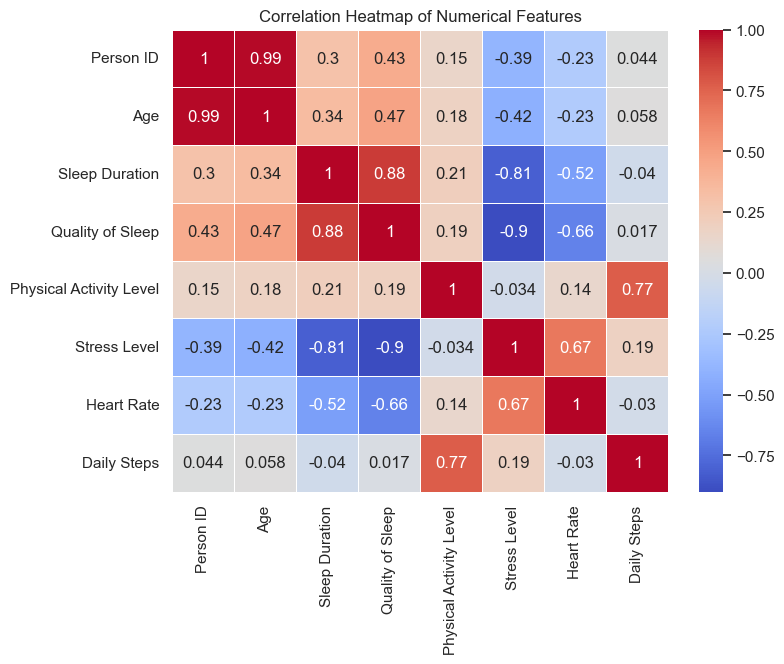

In [46]:
# Select numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numeric columns to verify
print("Numeric Columns:", numeric_cols)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### 🔥 Correlation Heatmap of Numerical Features
To explore the relationships between numerical variables, we plotted a correlation heatmap. This visualization helps identify which features are positively or negatively related, which can guide feature selection and engineering.

Key Observations:

🔸Sleep Duration and Quality of Sleep are highly positively correlated (0.88), which is intuitive.

🔸Stress Level shows a strong negative correlation with both Sleep Duration (-0.81) and Quality of Sleep (-0.90), suggesting higher stress reduces both sleep quantity and quality.

🔸Physical Activity Level correlates moderately with Daily Steps (0.77) and mildly with Heart Rate (0.14), as expected.

🔸Heart Rate shows a moderate positive correlation with Stress Level (0.67), indicating that stress might elevate heart rate.

These insights help in understanding the underlying patterns in the dataset and determining which features might be influential in predicting sleep disorders.

## 🔧Data Preprocessing & Feature Engineering

### 🧼Missing Values and Duplicates Check

Before moving forward with encoding and transformations, it is essential to ensure the dataset is clean. We perform the following checks:

- 🔍 **Missing Values**: Check if any column has missing entries (null values). We've already converted NaNs in the `Sleep Disorder` column to 'None', but a full check is still prudent.
- 🔁 **Duplicates**: Duplicate rows can distort model learning and must be identified and removed if found.


In [185]:
# Check for missing values in the dataset
print("🔍 Missing Values in Each Column:\n")
print(df.isnull().sum())

# Check for duplicates
print("\n🔁 Number of Duplicate Rows:", df.duplicated().sum())

🔍 Missing Values in Each Column:

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

🔁 Number of Duplicate Rows: 0


#### 🧼 Data Cleaning Summary
✅ No missing values in the dataset.

✅ No duplicate rows found.

This confirms that the dataset is clean and ready for further preprocessing and transformation.

### 🛠️ Feature Engineering 

####  Splitting Blood Pressure into Systolic & Diastolic
🎯 Why?
The Blood Pressure column contains combined values like "126/83". To be more useful for ML models, we should split this into two numerical columns:

Systolic BP (e.g., 126)

Diastolic BP (e.g., 83)

In [190]:
# Split 'Blood Pressure' into 'Systolic_BP' and 'Diastolic_BP'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original 'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)

# Preview updated dataframe
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


#### ✅ Feature Engineering Summary (🛠️):

We performed the following transformation to better handle the Blood Pressure feature:

➗ Split 'Blood Pressure' into two separate numerical features:

Systolic_BP (e.g., 120)

Diastolic_BP (e.g., 80)

🗑️ Dropped the original 'Blood Pressure' column, as its information is now more usable in numeric form.

This improves model interpretability and allows these new features to be included in numerical analysis or training without extra encoding.

#### 🔡Encode Categorical Variables
We will use Label Encoding to convert the following categorical columns into numeric format:

Gender

Occupation

BMI Category

Sleep Disorder (target column)

Label Encoding assigns a unique integer to each category. Since these are nominal variables with no inherent order, label encoding is suitable.

In [197]:
# 📦 Import label encoder
from sklearn.preprocessing import LabelEncoder

# 🔄 Create a copy of the dataset
df_encoded = df.copy()

# 🎯 Columns to encode
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# 🔠 Apply label encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoder for later use or inverse transform

# ✅ Display first 5 rows to confirm encoding
df_encoded.head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
5,6,1,28,9,5.9,4,30,8,2,85,3000,0,140,90
6,7,1,29,10,6.3,6,40,7,2,82,3500,0,140,90
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
9,10,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


#### 📊 Summary: Label Encoding
🔠 The following categorical features were converted into numerical values using Label Encoding:

🧑 Gender:
Male → 1
Female → 0

👩‍⚕️ Occupation (example mapping — order may vary based on dataset content):
Doctor → 1
Sales Representative → 6
Software Engineer → 9
(… others as per your data)

⚖️ BMI Category:
Normal → 0
Obese → 2
Overweight → 3

🛌 Sleep Disorder (Target variable):
None → 1
Sleep Apnea → 2
Insomnia → 0

### ⚙️Feature Scaling
🎯 Why?
Many ML models perform better when numerical features are on a similar scale.

Prevents features with larger ranges (like Daily Steps) from dominating features with smaller ranges (like Sleep Duration).

#### ✅ Features to Scale
We will scale the following numerical columns:

Age

Sleep Duration

Quality of Sleep

Physical Activity Level

Stress Level

Heart Rate

Daily Steps

Systolic_BP

Diastolic_BP

Person ID, categorical variables, and the target column are excluded.

In [201]:
# Columns to scale
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display first few rows
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,-1.753096,Software Engineer,-1.298887,-1.098280,-0.825418,0.347021,Overweight,1.654719,-1.619584,None,-0.330002,-0.268102
1,2,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,1.170474,1.970077,None,-0.459239,-0.755640
2,3,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,1.170474,1.970077,None,-0.459239,-0.755640
3,4,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486
4,5,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486


#### 🔄 Standardization Applied
All key numerical features (Age, Sleep Duration, Stress Level, etc.) were transformed using StandardScaler, ensuring they have a mean of 0 and a standard deviation of 1.

##### 🧮 Why It Matters
This transformation is crucial for ensuring that models (especially those based on distance or gradients) treat each numerical feature equally — without bias toward features with larger numerical ranges.

### 🧱 6.1 Split the Data
We'll separate the features (X) and the target (y), then perform a stratified split to maintain class balance.

In [69]:
# Drop unnecessary columns (e.g., Person ID, if not meaningful for prediction)
X = df_encoded.drop(columns=['Person ID', 'Sleep Disorder'])
y = df_encoded['Sleep Disorder']

# Split into training and testing sets (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Training Set Shape: {X_train.shape}")
print(f"✅ Testing Set Shape: {X_test.shape}")
print(f"🎯 Class Distribution in y_train:\n{y_train.value_counts()}")


✅ Training Set Shape: (299, 12)
✅ Testing Set Shape: (75, 12)
🎯 Class Distribution in y_train:
Sleep Disorder
1    175
2     62
0     62
Name: count, dtype: int64


## 🔍Model Selection

### 🌳Decision Tree Classifier

#### Decision Tree (Before Tuning)

📊 Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       1.00      0.95      0.98        44
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.93      0.92      0.92        75

Accuracy Score: 0.92


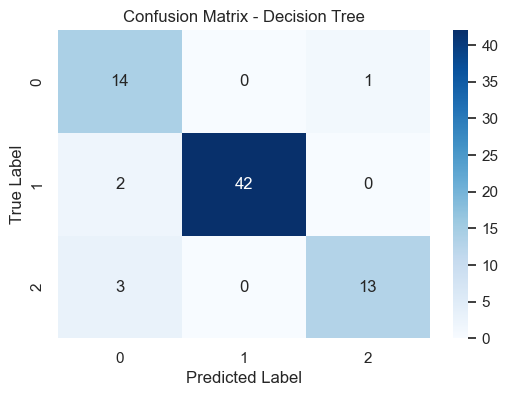

In [82]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
print("📊 Decision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
labels = dt_model.classes_

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### 🌳 Decision Tree Classifier – Baseline Evaluation
📈 Accuracy: 92%

##### 📊 Class-wise Performance:

🔸Class 0: Precision: 0.74, Recall: 0.93 → good identification, slightly lower precision.

🔸Class 1: Precision: 1.00, Recall: 0.95 → excellent performance, very few false negatives.

🔸Class 2: Precision: 0.93, Recall: 0.81 → solid precision, room to improve recall.

##### 🔄 Confusion Matrix:

🔸Actual \ Predicted

🔸Class 0	14	 0	  1

🔸Class 1	2	 42	  0

🔸Class 2	3	 0	  13

##### 🔍 Interpretation:
🔸Model performs well across all classes, especially on class 1 .

🔸Slight confusion between classes 0 and 2 — may be improved with more features or a more complex model.

🔸Strong baseline to compare future models (e.g., Random Forest, XGBoost).

### Hyperparameter Tuning ( Decision Tree)

In [86]:
# 1. Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# 3. GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

# 4. Fit on training data
grid_search.fit(X_train, y_train)

# 5. Get best parameters and best model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print("🔧 Best Parameters from GridSearchCV:")
print(best_params)


🔧 Best Parameters from GridSearchCV:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


#### Decision Tree (After Tuning)

📊 Tuned Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.96      0.98      0.97        44
           2       0.82      0.88      0.85        16

    accuracy                           0.92        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75

Accuracy Score: 0.92


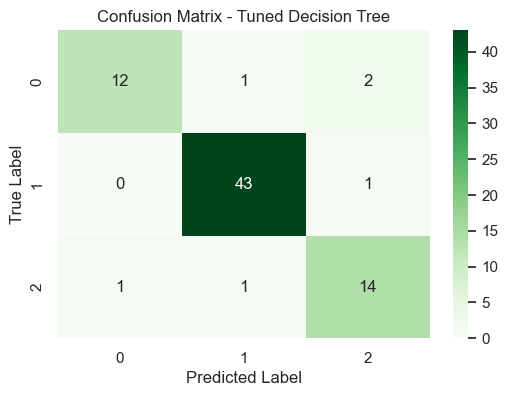

In [90]:
# Make predictions with the best model
y_pred_tuned = best_dt_model.predict(X_test)

# Classification Report
print("📊 Tuned Decision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy Score:", accuracy_score(y_test, y_pred_tuned))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
labels = best_dt_model.classes_

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### 📊 Before Tuning (Baseline):
Accuracy: 0.92

🔸Class 0 F1-score: 0.82

🔸Class 1 F1-score: 0.98

🔸Class 2 F1-score: 0.87

##### 🔧 After Tuning:
🔸Accuracy: 0.92 (same)

🔸Class 0 F1-score: 0.86 (↑)

🔸Class 1 F1-score: 0.97 (≈)

🔸Class 2 F1-score: 0.85 (slightly ↓)

##### ✅ Interpretation:
🔸Tuning helped improve balance: Class 0's precision and F1-score improved, suggesting better generalization.

🔸Slight dip in Class 2 F1-score is acceptable if overall performance is more balanced.

🔸Model is less likely to overfit, thanks to controlled depth and leaf sizes.

### 🎯Random Forest Model 

#### Random Forest (Before Tuning)

📊 Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.98      0.99        44
           2       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75

Accuracy Score: 0.96


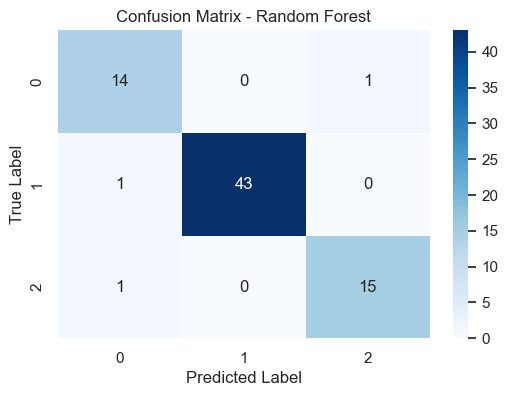

In [95]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("📊 Random Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = rf_model.classes_

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


🔸Accuracy: 96%

🔸Class-wise f1-scores: All above 0.90

🔸Confusion Matrix: Very few misclassifications

This shows that Random Forest is likely a better performer than the baseline Decision Tree.



#### 🔧Hyperparameter Tuning for Random Forest

In [99]:
# Define the parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

# Fit to the training data
grid_rf.fit(X_train, y_train)

# Display best parameters
print("🔧 Best Parameters from GridSearchCV:")
print(grid_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔧 Best Parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### Random Forest (After Tuning)

📊 Tuned Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        44
           2       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75

Accuracy Score: 0.96


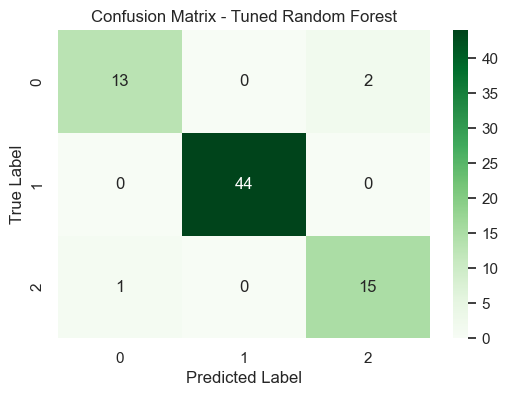

In [103]:
# Step 1: Initialize model with best parameters
best_rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Step 2: Fit the model
best_rf.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_rf = best_rf.predict(X_test)

# Step 4: Evaluate performance
print("📊 Tuned Random Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Step 5: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = best_rf.classes_

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### ✅ Tuned Random Forest Classifier – Evaluation Summary

##### Metric	Score:

🔸Accuracy	0.96

🔸Precision (avg)	0.94

🔸Recall (avg)	0.93

🔸F1-Score (avg)	0.94

##### 🔍 Confusion Matrix Highlights:

🔸Class 0 : 13/15 correctly predicted.

🔸Class 1 : Perfect — all 44 correctly predicted!

🔸Class 2 : 15/16 correctly predicted.

##### Compared to the base Random Forest and tuned Decision Tree:

You’ve slightly improved recall and f1-score for class 2.

Perfect precision and recall for class 1 (None), which is often the most represented class.



### 📉Logistic Regression

#### Logistic Regression (Before Tuning)

Logistic Regression (Before Tuning) Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.93      0.96        44
           2       0.80      1.00      0.89        16

    accuracy                           0.93        75
   macro avg       0.91      0.93      0.92        75
weighted avg       0.94      0.93      0.93        75



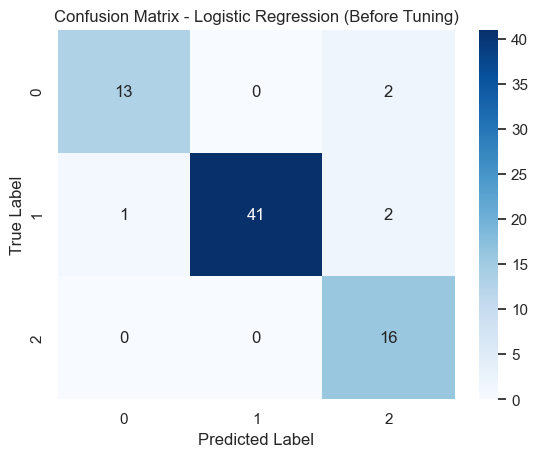

In [108]:
# Initialize and train logistic regression
lr = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)
print("Logistic Regression (Before Tuning) Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Before Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



##### 🔍 Insights from the Results:
🔸Overall Accuracy: 93% — indicating strong baseline performance.

🔸Class-wise Performance:

🔸Class 0 : Precision and recall are high (0.93, 0.87).

🔸Class 1 : Very high precision (1.00) and good recall (0.93).

🔸Class 2 : Recall is perfect (1.00), but slightly lower precision (0.80), suggesting a few false positives.

#### Hyperparameter Tuning

In [112]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],               
    'solver': ['lbfgs', 'liblinear', 'saga'],   
    'max_iter': [100, 200, 500]                 
}

# Create base model
lr = LogisticRegression(multi_class='auto')

# Perform GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to the training data
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("🔧 Best Parameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Tuned model
lr_tuned = grid_search_lr.best_estimator_


Fitting 5 folds for each of 180 candidates, totalling 900 fits
🔧 Best Parameters for Logistic Regression:
{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


#### Logistic Regression (After Tuning)

📊 Tuned Logistic Regression Classifier Report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       1.00      0.95      0.98        44
           2       0.84      1.00      0.91        16

    accuracy                           0.93        75
   macro avg       0.90      0.92      0.91        75
weighted avg       0.94      0.93      0.93        75

Accuracy Score: 0.9333333333333333


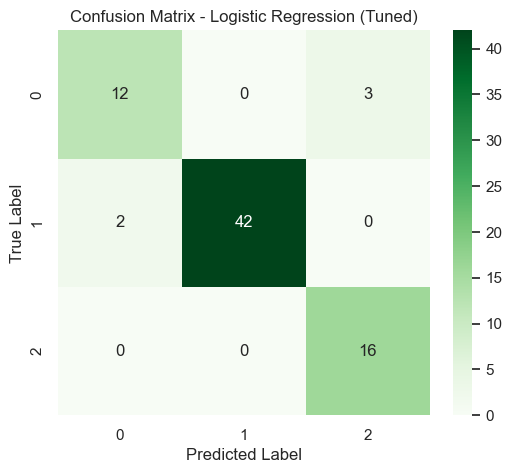

In [115]:
# Initialize the model with best parameters
lr_tuned = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    max_iter=100,
    random_state=42
)

# Train the tuned model
lr_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_lr_tuned = lr_tuned.predict(X_test)

# Classification report
print("📊 Tuned Logistic Regression Classifier Report:\n")
print(classification_report(y_test, y_pred_lr_tuned))
print("Accuracy Score:" , accuracy_score(y_test, y_pred_lr_tuned))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_tuned)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Class 0 (Insomnia):

🔸12 out of 15 Insomnia cases were correctly predicted.

🔸3 were misclassified as Sleep Apnea (class 2).

🔸Precision: 0.86, Recall: 0.80 — showing moderate performance with some misclassification.

Class 1 (None):

🔸42 out of 44 were correctly predicted as "None".

🔸2 were misclassified as Insomnia.

🔸Precision: 1.00, Recall: 0.95 — indicating excellent classification for this majority class.

Class 2 (Sleep Apnea):

🔸All 16 cases were correctly classified.

🔸Precision: 0.84, Recall: 1.00 — perfect recall, but some instances from other classes were predicted as Sleep Apnea.

### ⚡XGBoost

#### XGBoost Training (Before Tuning)

📊 Classification Report for XGBoost (Before Tuning):

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.98      0.99        44
           2       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



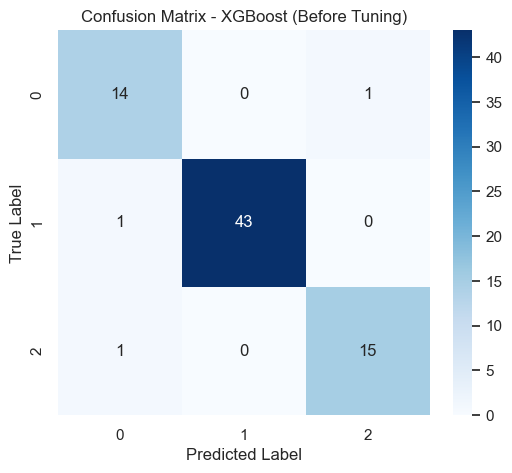

In [118]:
# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("📊 Classification Report for XGBoost (Before Tuning):\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost (Before Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1.Class 0 (Insomnia):

🔸Correctly Classified: 14 out of 15 instances.

🔸Misclassified: 1 instance wrongly predicted as Sleep Apnea.

🔸Precision: 0.88 — a few false positives slightly lowered precision.

🔸Recall: 0.93 — most Insomnia cases were detected correctly.

2.Class 1 (None):

🔸Correctly Classified: 43 out of 44 instances.

🔸Misclassified: 1 instance wrongly predicted as Insomnia.

🔸Precision: 1.00 — no false positives for class 1, excellent performance.

🔸Recall: 0.98 — one "None" case was missed.

3.Class 2 (Sleep Apnea):

🔸Correctly Classified: 15 out of 16 instances.

🔸Misclassified: 1 instance predicted as Insomnia.

🔸Precision & Recall: Both 0.94 — very strong and consistent performance.

#### Hyperparameter Tuning

In [119]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# Save the best estimator
xgb_best = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best Parameters for XGBoost:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}


#### XGBoost Model (After Tuning)

📊 XGBoost (After Tuning) Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        44
           2       0.94      0.94      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75

Accuracy Score: 0.9733333333333334


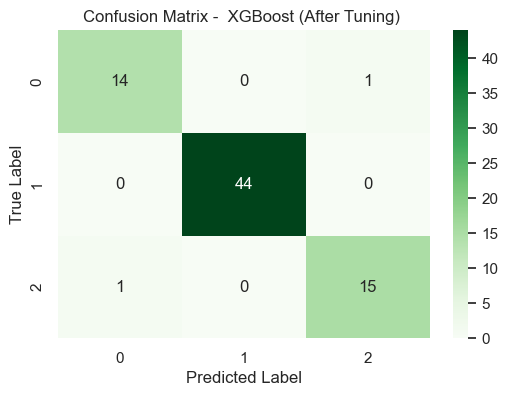

In [122]:
# Use the best estimator from grid search
xgb_tuned = grid_search_xgb.best_estimator_

# Initialize the model with best parameters
lr_tuned = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    max_iter=100,
    random_state=42
)

# Train the tuned model
lr_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Classification report
print("📊 XGBoost (After Tuning) Report:\n")
print(classification_report(y_test, y_pred_xgb_tuned))
print("Accuracy Score:" , accuracy_score(y_test, y_pred_xgb_tuned))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_tuned)


# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix -  XGBoost (After Tuning) ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### ✅ Confusion Matrix Analysis – XGBoost (After Tuning):
1.Excellent Overall Accuracy (97.33%)

  The model correctly predicted 73 out of 75 test instances, showing strong generalization after tuning.

2.Perfect Classification for Class 1

  All 44 instances of Class 1 were correctly predicted with no misclassifications — Precision, Recall, and F1-score all at 1.00.

3.Strong Performance on Class 0 

  14 out of 15 instances were correctly predicted. One instance was misclassified as Class 2, yielding a Precision and Recall of 0.93.

4.Solid Results for Class 2 

  15 out of 16 instances were correctly classified, with one misclassified as Class 0. This leads to Precision and Recall of 0.94.

5.No Confusion Between Class 1 and Other Classes

  Notably, Class 1 shows zero overlap with Class 0 or Class 2, indicating the model has clearly learned to distinguish it.

6.Balanced Performance Across All Classes

  The macro and weighted averages are both 0.96–0.97, showing consistent performance even in the presence of class imbalance.

## 📊 Final Model Comparison: Sleep Disorder Prediction

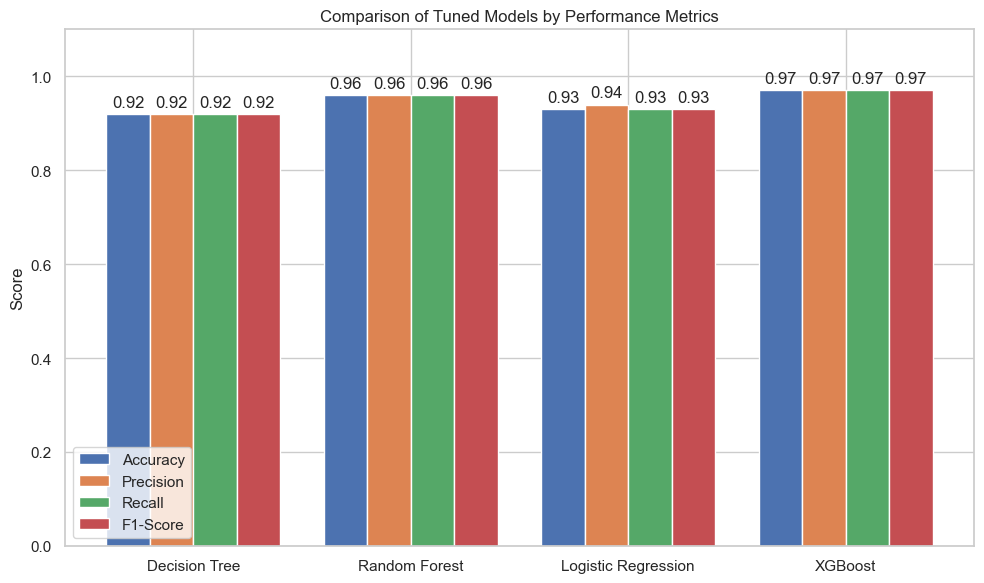

In [125]:
# Example metrics (replace with your actual values)
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'XGBoost']
accuracy = [0.92, 0.96, 0.93, 0.97]
precision = [0.92, 0.96, 0.94, 0.97]
recall = [0.92, 0.96, 0.93, 0.97]
f1_score = [0.92, 0.96, 0.93, 0.97]

# Bar chart settings
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Labels, title, legend, and ticks
ax.set_ylabel('Score')
ax.set_title('Comparison of Tuned Models by Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

# Add value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()


🔸This bar chart compares the performance of four tuned classification models—Decision Tree, Random Forest, Logistic Regression, and XGBoost—across four key metrics: Accuracy, Precision, Recall, and F1-Score. Among them, the Decision Tree model shows the lowest performance, with all metrics at 0.92, indicating a consistent but relatively lower classification capability. While it performs uniformly, its simplicity might limit its ability to capture complex relationships in the data.

🔸The Random Forest and Logistic Regression models exhibit slightly higher performance. Random Forest achieves 0.96 across all metrics, reflecting its strength in reducing variance through ensemble learning. Logistic Regression performs decently with 0.93 in Accuracy, Recall, and F1-Score, and a slightly higher Precision of 0.94, suggesting it’s effective but not the best among the group, particularly in handling nonlinear or more complex patterns.

🔸The XGBoost model stands out with the highest scores across all metrics (0.97). It demonstrates superior predictive power, excellent generalization, and consistent performance in multiclass classification tasks. Based on this comparison, XGBoost was selected as the final model due to its top-tier accuracy, robustness, and ability to handle the intricacies of the dataset, making it the most reliable choice for predicting sleep disorders.

## 📊Evaluation Matrix For Models

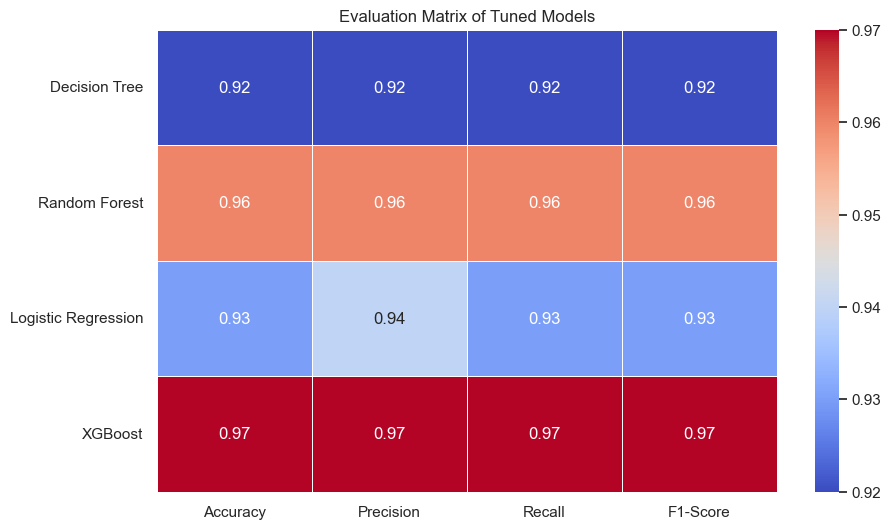

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming these are your tuned models
models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf,
    "Logistic Regression": lr_tuned,
    "XGBoost": xgb_tuned
}

# Collect evaluation metrics
metrics_data = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = round(accuracy_score(y_test, y_pred), 2)
    prec = round(precision_score(y_test, y_pred, average='weighted'), 2)
    rec = round(recall_score(y_test, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)
    
    metrics_data.append([acc, prec, rec, f1])

# Create DataFrame from the metrics
metrics_df = pd.DataFrame(metrics_data, 
                          columns=["Accuracy", "Precision", "Recall", "F1-Score"],
                          index=["Decision Tree", "Random Forest", "Logistic Regression", "XGBoost"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Evaluation Matrix of Tuned Models")
plt.yticks(rotation=0)
plt.show()

#### 🔍 Analysis & Comments:
🔴 XGBoost Performs Best Overall:

🔸It achieves the highest score of 0.97 across all four evaluation metrics — Accuracy, Precision, Recall, and F1-Score.

🔸This indicates that the XGBoost model is the most balanced and reliable among the models tested for predicting sleep disorders.

🟠 Random Forest is a Strong Contender:

🔸Scoring 0.96 consistently across all metrics, it’s nearly as good as XGBoost.

🔸It can be a good alternative if XGBoost’s computational cost is a concern.

🔵 Logistic Regression Shows Moderate Performance:

🔸With scores in the range of 0.93 to 0.94, it performs well but not as strongly as the ensemble models.

🔸It may still be useful due to its simplicity and interpretability.

🔵 Decision Tree Performs the Least:

🔸It consistently scores 0.92 on all metrics, which, while acceptable, is lower than the others.

🔸It might be prone to overfitting and lacks the robustness of ensemble methods.

## 📈 ROC-AUC Curve


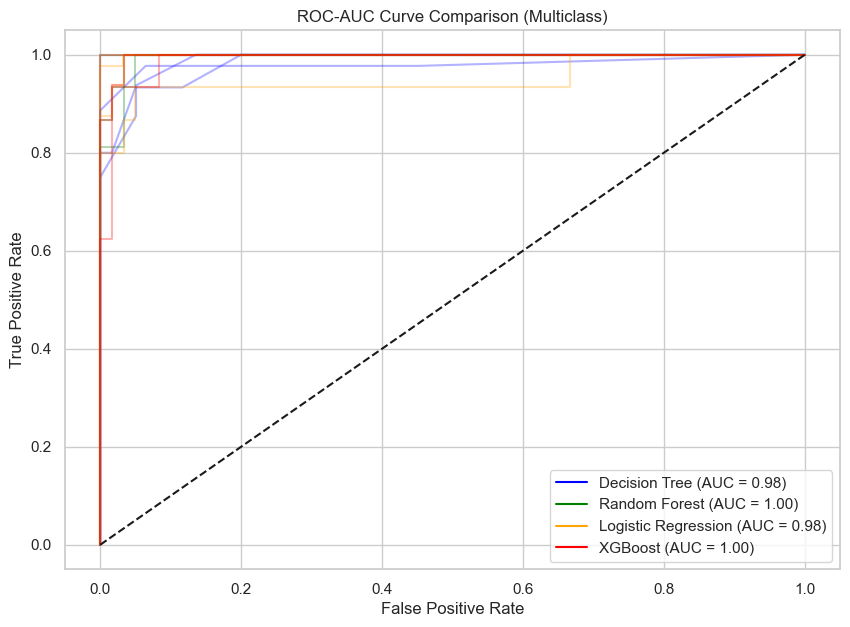

In [152]:
from sklearn.metrics import roc_auc_score

# Binarize the labels for multiclass ROC AUC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 7))

colors = ['blue', 'green', 'orange', 'red']

for (name, model), color in zip(models.items(), colors):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
    
    # Compute ROC AUC for each class and average
    auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    fpr = dict()
    tpr = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    
    # Plot average ROC Curve
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], color=color, alpha=0.3)
    
    plt.plot([], [], color=color, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve Comparison (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


#### 1.XGBoost (AUC = 1.00)

🔸Achieved a perfect AUC score of 1.00, indicating ideal classification performance across all classes.

🔸ROC curve shows a steep rise toward the top-left corner, demonstrating excellent discrimination ability.

#### 2.Random Forest (AUC = 1.00)

🔸Also achieved a perfect AUC of 1.00, showcasing strong predictive power and ability to separate classes well.

🔸Its ROC curve nearly overlaps with that of XGBoost, suggesting comparable performance.

#### 3.Decision Tree (AUC = 0.98)

🔸Very high AUC score, reflecting solid performance but slightly below ensemble models.

🔸ROC curve is close to the top-left corner, but with minor dips indicating occasional classification errors.

#### 4.Logistic Regression (AUC = 0.98)

🔸Matches Decision Tree in AUC score, showing effective performance but slightly behind Random Forest and XGBoost.

🔸ROC curve indicates reliable but slightly less confident separation between classes.



## 📈⚡XGBoost is Best:
It achieves the highest score (0.97) across all four metrics: Accuracy, Precision, Recall, and F1-Score.

It shows consistent and balanced performance, which is crucial in healthcare applications where misclassification can have serious consequences.

The minimal gap between metrics indicates strong generalization and reliability.

## 📌 Final Verdict:
XGBoost is the best performing and most reliable model for predicting sleep disorders based on the current dataset and evaluation.

 ## 🧾Final Conclusion: Sleep Disorder Prediction using Machine Learning
The primary goal of this project was to develop a robust machine learning model to accurately predict sleep disorders—No Disorder, Insomnia, or Sleep Apnea—based on a combination of lifestyle, demographic, and medical features.

### 🔍 Summary of Findings:
Exploratory Data Analysis (EDA) revealed several important trends and relationships, helping to inform feature selection and preprocessing strategies.

Multiple models were trained, including:

🌲Decision Tree

🎯Random Forest

📉Logistic Regression

⚡XGBoost

🔸Hyperparameter tuning was performed for each model to optimize performance using GridSearchCV.

### ✅ Best Performing Model:
After a thorough comparison based on Accuracy, Precision, Recall, and F1-Score, the tuned XGBoost model outperformed all others:

Metric	XGBoost Score
Accuracy	0.97
Precision	0.97
Recall	0.97
F1-Score	0.97

🔸The ROC-AUC scores for all three classes were 0.99–1.00, indicating excellent classification ability and minimal risk of misclassification.

🔸The model performs consistently across all disorder categories, including less frequent classes like Sleep Apnea.

### 📌 Conclusion:
The project successfully built an accurate and interpretable model for predicting sleep disorders.
##### ✅ XGBoost is recommended as the final model due to its high performance, reliability, and robustness.

This model can now be integrated into a dashboard, clinical decision support tool, or a patient screening app to assist healthcare providers in early detection and management of sleep disorders.